In [178]:
from Jiaxin import *
from Peilun import *
from Yijun import *

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

## Getting the Dataset

Merge all given 10 dataframes on the foreign keys provided into 1 dataframe and convert this dataframe into a pickle file.

We chose to sample 100k rows out of the original 800k because we have relatively strongly correlated attributes in the dataset, so we do not need that much data to decrease the uncertainty in the parameters of our models.


In [179]:
# get_dataset()

## Cleaning the Dataset

Set the allowed percentage of missing data to be 50% in general, unless they are important columns (good predictors for regression). 

In this case, none of the columns with more than 50% missing data is important and we drop all of them.

In [180]:
df = clean_dataset()

## Exploratory Data Analysis

Now that our dataframe is ready, let's explore the dataset with a time series and interactive map.

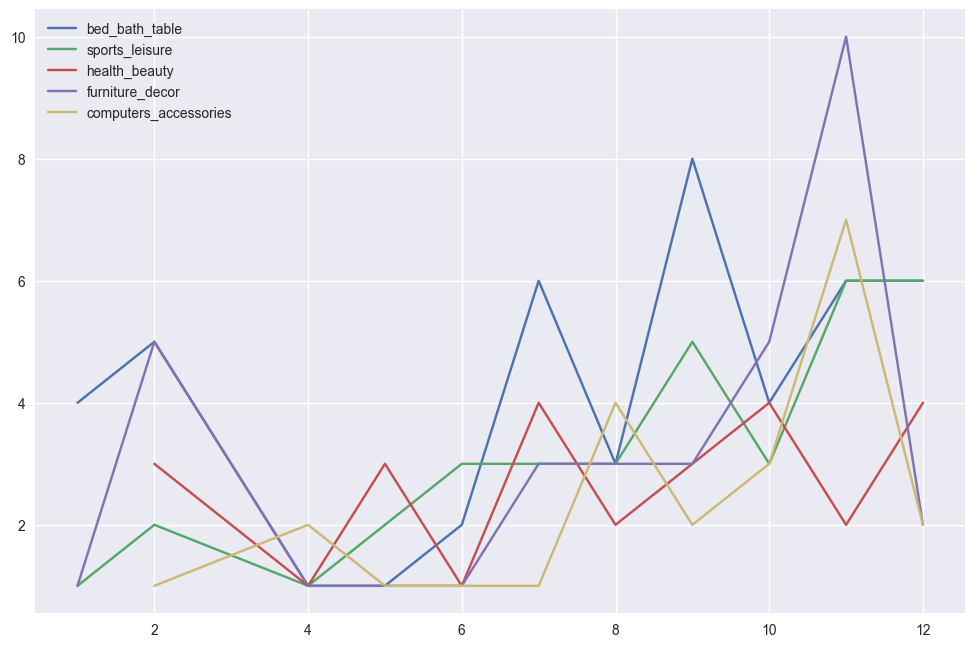

In [181]:
time_series()

We notice that there is a generally increasing trend in sales of all product categories over the year, and the spike is especially significant in November.

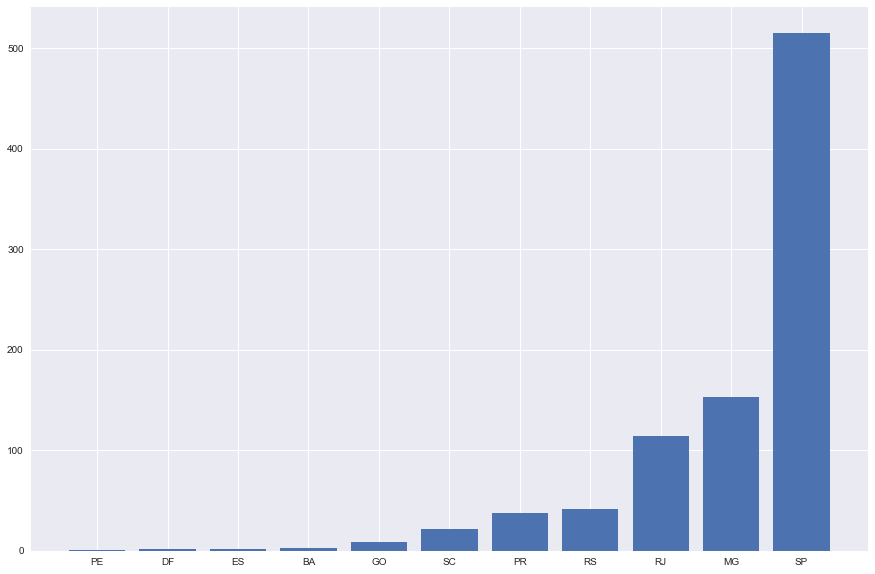

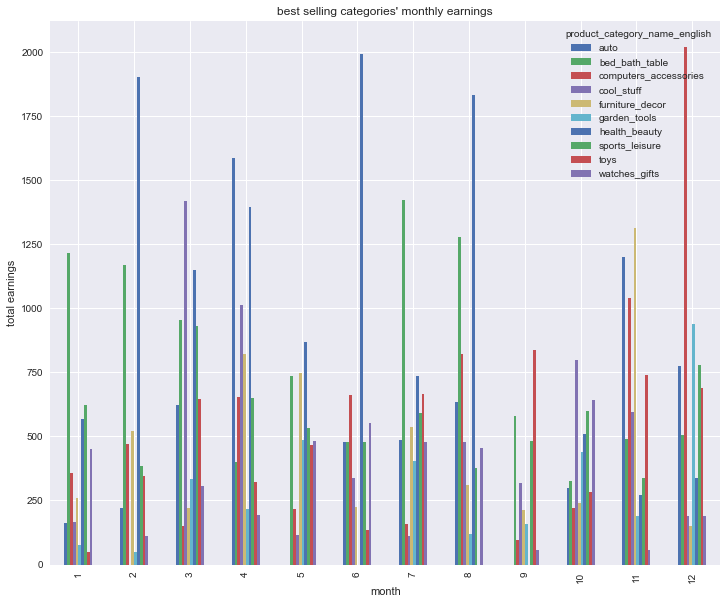

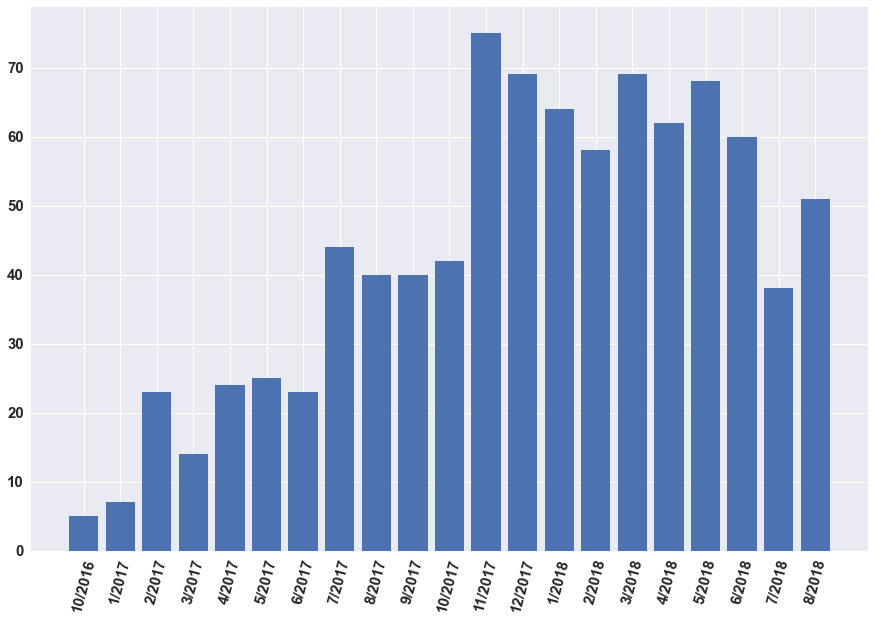

In [182]:
findings()

We order the number of customers by their states, and we find that most orders came from Sao Paulo. From the map, we can very clearly see the distribution of customers, with the radius of each circle corresponding to customer count from that state.

Then we look at the popularity of each category of products over the entire time period, and we notice that the sales of computer accessories is generally consistent, except in December where there was a huge increase.

Finally, the time series shows us that the period of high sales for Olist was Nov 2017 to Jun 2018.

# Problem 1: What are the factors affecting the price of a product?

## ------------------REGRESSION PART LEFT----------------

# Problem 2: Can we predict the category of Customer Lifetime Value (CLV) that customers fall into – low value, mid value, or high value?

Customer Lifetime Value (CLV) is the total monetary value of purchases made by a customer with a business over his entire lifetime - the time period that the customer purchases with the business before moving to your competitors.


*   Low Value: Customers who are less active than others, not very frequent buyers and generate very low/zero/negative revenue.

*   Mid Value: Customers who often use Olist (but not as much as our High Values) and generates moderate revenue.

*    High Value: The group we don’t want to lose. High revenue, frequency and low inactivity.

We will use 3 predictors: recency, frequency and monetary value (or revenue).

## Data Exploration of CLV

In [183]:
CLV_df = CLV_EDA(df)

Time Range: 2016-10-04 TO 2018-08-26
No. of unique customers: 720
Total sales: 96122.17000000001



## Recency

*Recency refers to the amount of time elapsed since a customer’s last transaction.*

Find the most recent purchase date of each customer and see how many days they are inactive for, then apply k-means clustering to assign customers a recency cluster.


count    901.000000
mean     242.207547
std      149.693629
min        0.000000
25%      123.000000
50%      227.000000
75%      343.000000
max      691.000000
Name: recency, dtype: float64




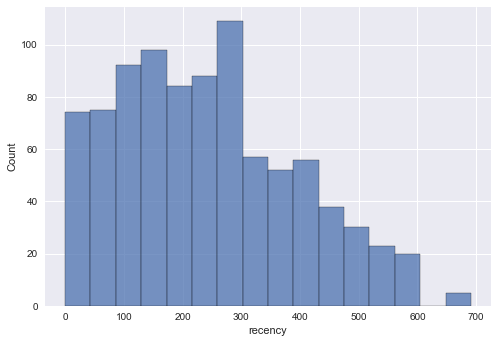

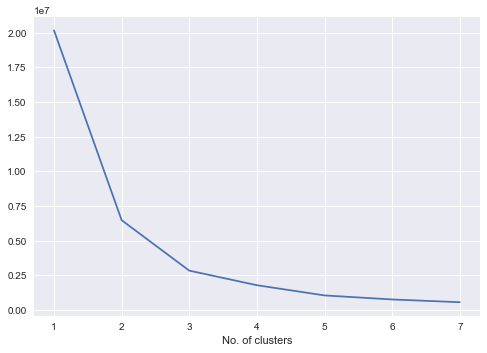

                 count        mean        std    min     25%    50%     75%  \
recency_cluster                                                               
0                294.0   82.904762  45.893233    0.0   43.75   82.5  119.50   
1                322.0  227.537267  41.729214  156.0  190.00  227.0  267.75   
2                184.0  369.179348  41.289931  299.0  334.00  373.0  404.25   
3                101.0  521.376238  55.783304  449.0  481.00  511.0  559.00   

                   max  
recency_cluster         
0                155.0  
1                297.0  
2                444.0  
3                691.0  




In [184]:
CLV_df = CLV_recency(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the recency values are clustered around the left tail of the distribution.

We also find that the most common customers are those with a recency score of 300.

Elbow method tells us that the optimal number of clusters is 4, with cluster 0 being our worst customers (customers who have not bought from Olist for a long time) and cluster 3 being our best customers.

## Frequency

*Frequency refers to how often a customer has bought from the company.* 

Find the total number orders for each customer.


count    901.000000
mean       1.625971
std        1.241394
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: frequency, dtype: float64




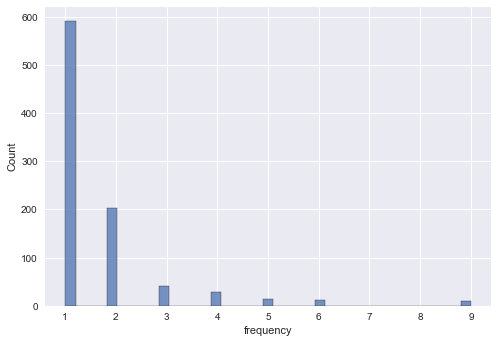

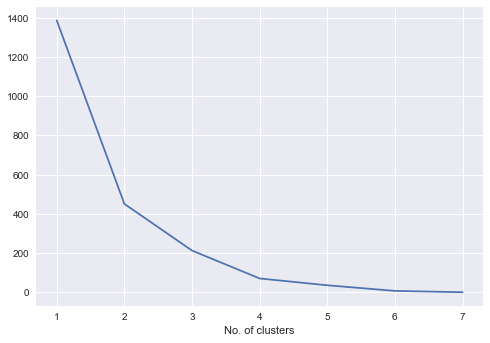

                   count      mean       std  min  25%  50%  75%  max
frequency_cluster                                                    
0                  591.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
1                  246.0  2.170732  0.377041  2.0  2.0  2.0  2.0  3.0
2                   55.0  4.709091  0.809040  4.0  4.0  4.0  5.0  6.0
3                    9.0  9.000000  0.000000  9.0  9.0  9.0  9.0  9.0




In [185]:
CLV_df = CLV_frequency(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the frequency values are clustered around the left tail of the distribution.

We also find that the most common customers are those with frequency 1, that means most customers only make one time purchases.  

Elbow method tells us that the optimal number of clusters is 4, with cluster 0 being our worst customers (customers who did not buy from Olist regularly) and cluster 3 being our best customers.

## Revenue

*Revenue refers to how much money a customer has spent with the company.*


count     901.000000
mean      408.535960
std      1217.962464
min         1.430000
25%        70.140000
50%       137.780000
75%       256.960000
max      9126.180000
Name: revenue, dtype: float64




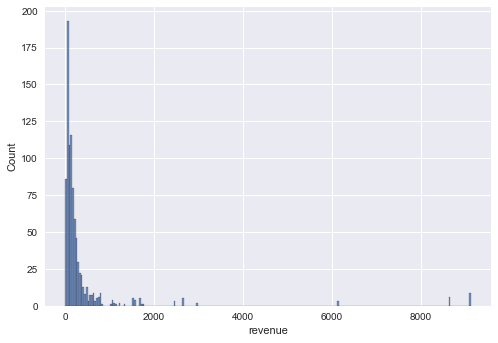

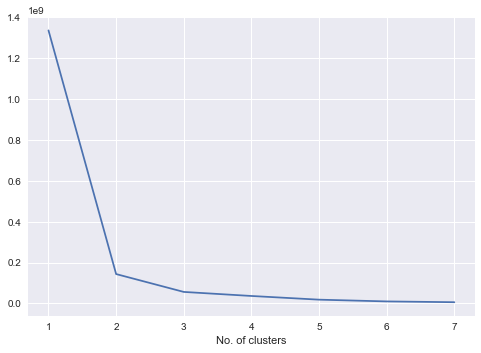

                 count         mean          std      min        25%  \
revenue_cluster                                                        
0                846.0   178.575496   162.789105     1.43    66.9325   
1                 37.0  1748.216486   605.430391  1024.20  1234.6200   
2                 18.0  8462.890000  1102.142919  6117.60  8640.6000   

                      50%        75%      max  
revenue_cluster                                
0                 129.935   227.3075   842.43  
1                1570.480  2454.0300  2964.48  
2                8883.390  9126.1800  9126.18  




In [186]:
CLV_df = CLV_revenue(CLV_df)

From the summary statistics, mean is higher than median, so there is a positive right skew ie. most of the revenue values are clustered around the left tail of the distribution.

We also find that the most common customers are those with revenue 100.

Elbow method tells us that the optimal number of clusters is 3, with cluster 0 being our worst customers (customers who have spent the least on Olist products) and cluster 3 being our best customers.

## Overall RFM Score

Combine all 3 individual RFM scores into a single predictor, overall_score and sort it.

In [187]:
CLV_df = overall_RFM(CLV_df)

                  recency  frequency      revenue
overall_score                                    
0               79.402116   1.000000   150.718942
1              184.840278   1.354167   186.405278
2              301.203704   1.574074   228.893843
3              413.525926   1.874074   320.719259
4              431.720000   2.880000  1034.419800
5              372.285714   4.857143  4237.537143
6              256.000000   9.000000  9126.180000


We can see that score 0 is customers with the least value and 6 is customers with the highest value.

## Categorizing Customers

*    0 to 1: low value
*    2 to 3: mid value
*    4 to 6: high value

In [188]:
CLV_df = categorize(CLV_df)

## Plot Clusters

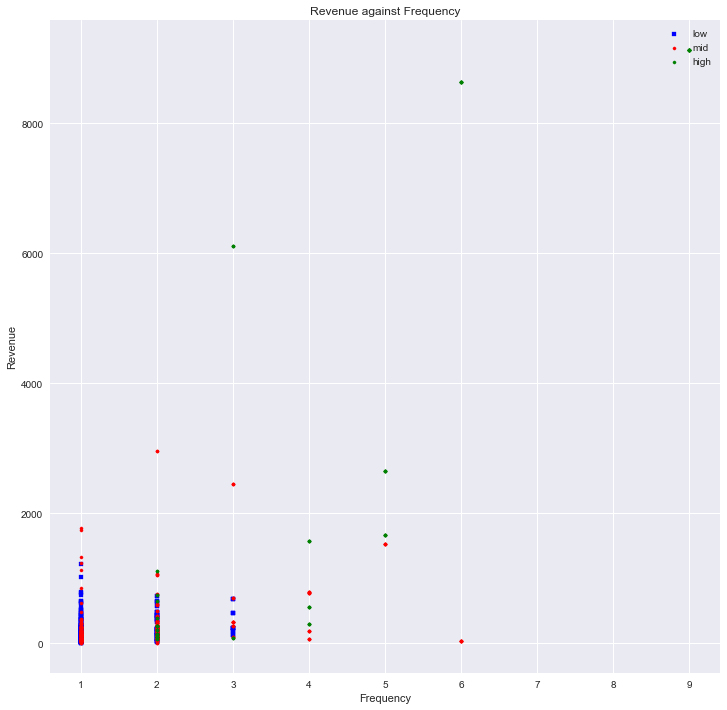

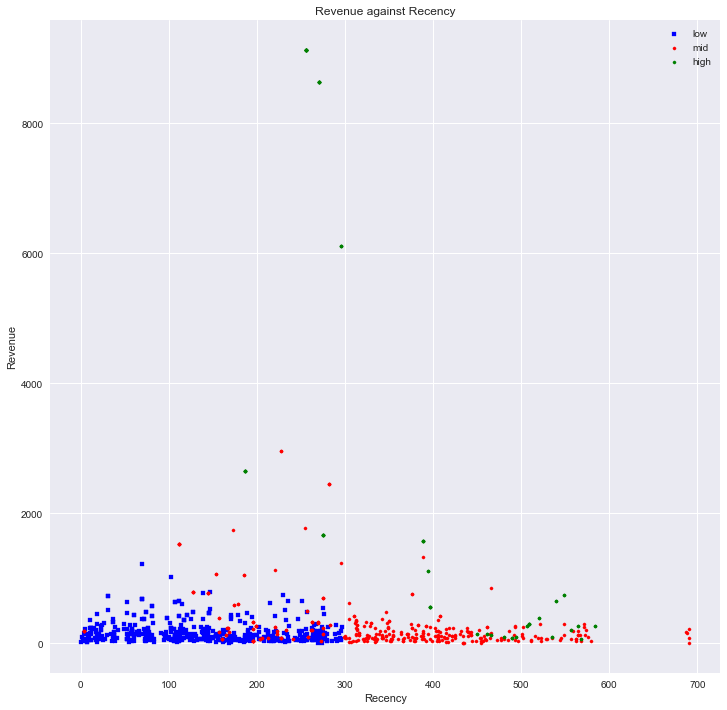

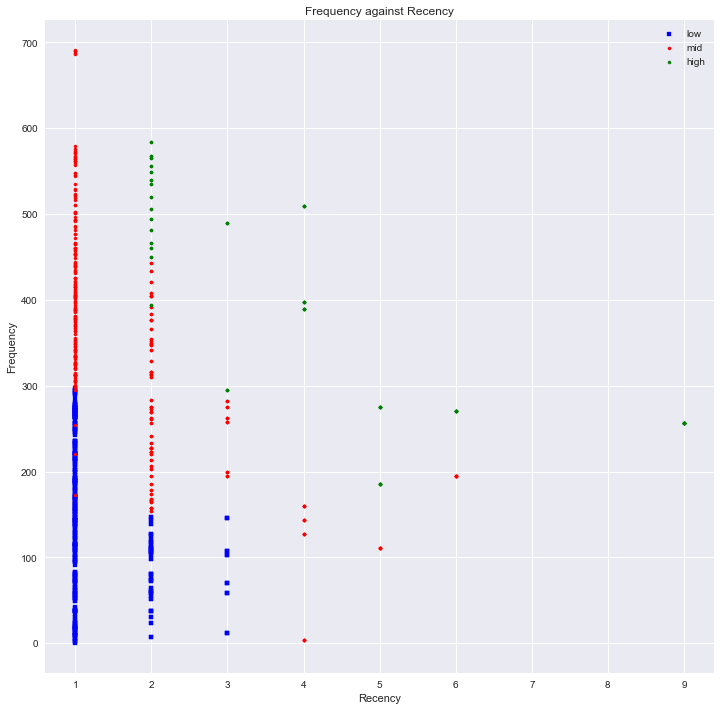

In [189]:
plot_clusters(CLV_df)

We see that the clusters for recency, frequency and revenue are distinct from one another. 

There are not many high value customers, which is expected given the low recency, frequency (most are one time purchases), and revenue, resulting in a low or mid customer lifetime value.

## Splitting Dataset into First 7 Months and Next 14 Months

From our timeseries, we have 21 months of data, from 2016 Oct to 2018 Aug. We take the first 7 months of data and use it to predict CLV for the next 14 months.

There is no cost specified in the dataset, so we take our response CLV to be the same as our predictor revenue.

In [190]:
CLV_7m, CLV_14m = split_months(CLV_df)

## Merging the Original Dataframe with the 14 Months Dataframe

In [191]:
CLV_merged = get_CLV_merged(CLV_14m, CLV_df)

             count          mean          std       min        25%       50%  \
CLV_cluster                                                                    
0            859.0    309.043551   478.642276      0.00     64.555    141.63   
1             19.0   7314.637895   877.548230   5928.96   6281.920   7647.25   
2              8.0  15144.487500  2656.735152  13219.50  13219.500  13219.50   

                   75%       max  
CLV_cluster                       
0              315.345   3139.52  
1             7990.625   8334.00  
2            18352.800  18352.80  




We note that the dataset is imbalanced since 97% of the customers belong to cluster 0 (low value customers).

## Correlation

Before building the model, let's look at the correlation between our predictor, overall RFM score, and response, CLV_cluster. Let's also do the same for CLV (the absolute number).

CLV_cluster          1.000000
m14_Revenue          0.953481
revenue              0.844601
revenue_cluster      0.814598
payment_value        0.500563
frequency            0.478670
frequency_cluster    0.367078
overall_score        0.319754
recency             -0.001574
price               -0.003399
recency_cluster     -0.022274
Name: CLV_cluster, dtype: float64


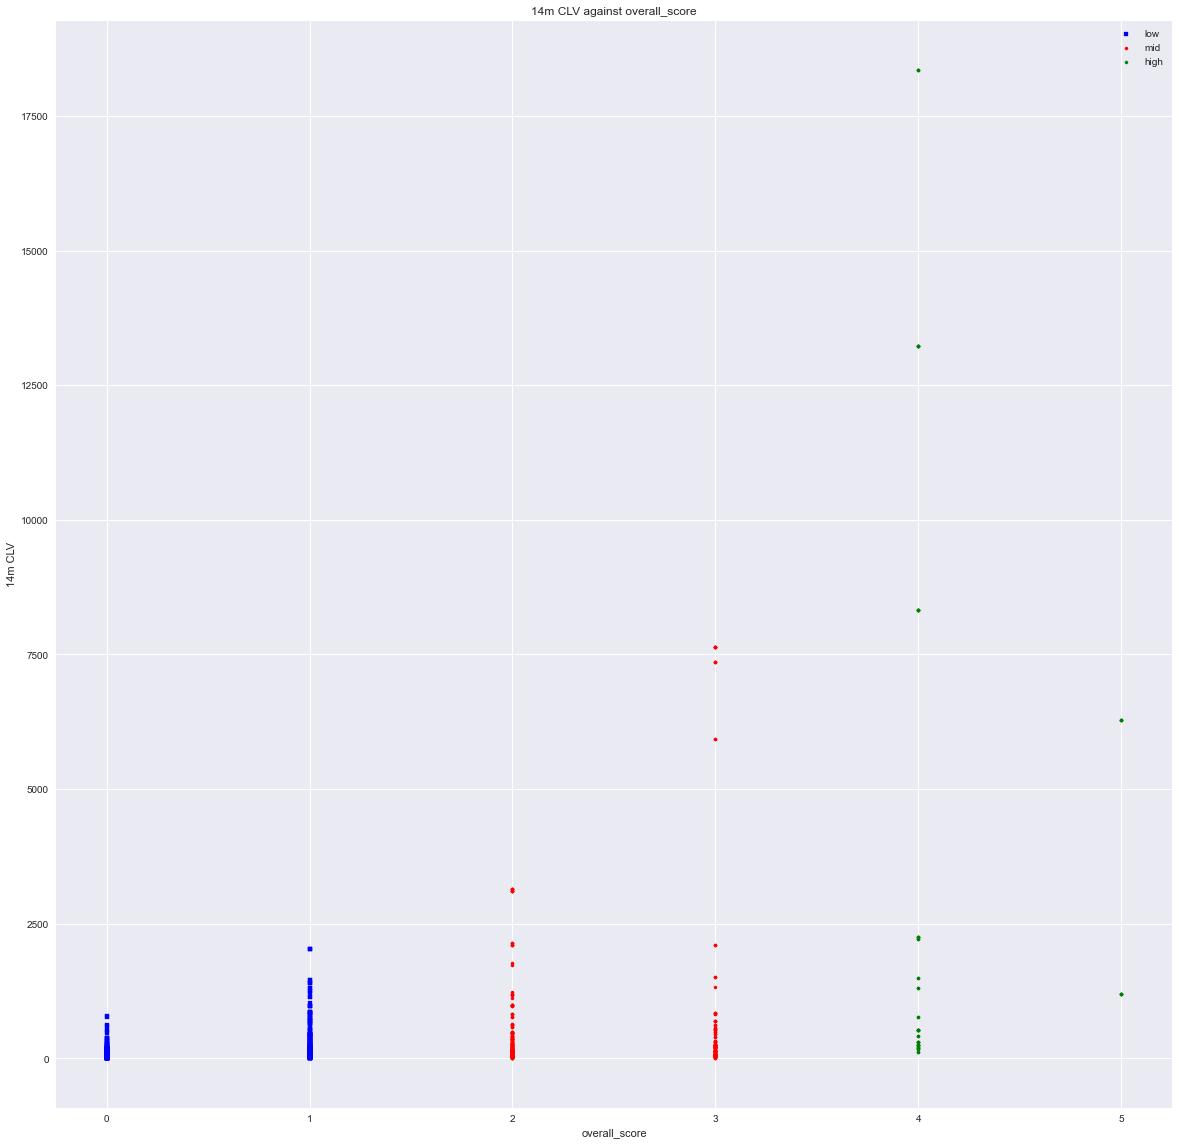

In [192]:
correlation_plot(CLV_merged)
print_correlation(CLV_merged)

From the correlation numbers, we see that revenue, frequency and overall_score will be helpful in predicting CLV_cluster.

The scatter plot also makes it quite clear that there is a positive correlation between overall_score in particular and CLV: the higher the RFM score, the higher the CLV.

## Converting Categorical Variable "category" to Numeric

In order for us to use XGBoost to predict CLV based on the "category" column, we need to convert the categorical values to numeric first, using one hot encoding.


In [193]:
CLV_merged = one_hot_encoding(CLV_merged)

## Classification

[03:37:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB classifier on training set: 0.97
Accuracy of XGB classifier on test set: 0.98
f1 score is: 0.830


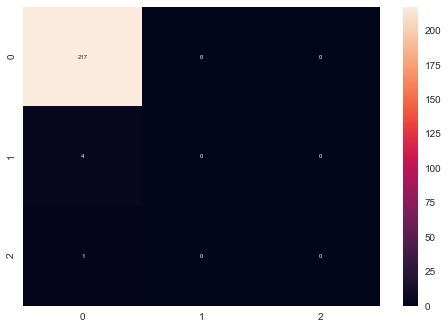

In [194]:
XGB_classification(CLV_merged)

Keeping in mind that our data is so imbalanced (97% of all customers are in the low value cluster), our predictor almost always predicts any given customer as a low value customer and this leads to high accuracy, which tells us nothing about how well our model is doing.

This means that using accuracy as a metric is not ideal, and we use f1 score instead, which takes into account this class imbalance. We consider recall to be twice as important as precision in our model - it is worse to misclassify a mid/high value customer to be low value and miss out on engagement, than to misclassify a low value customer to be mid/high value. We find that we get a pretty good f1 score of 0.830.

# Insights

## ------------------REGRESSION PART LEFT----------------

Now that we have the segmentation, we can start taking actions. The goals for each group are as follows:

*   Low Value: increase frequency
*   Mid Value: increase frequency + improve retention 
*   High Value: improve retention